# Actividades de clase, semanas 4, 5 y 6.

La practica consta de 3 módulos, el objetivo es afianzar los conceptos vistos sobre transformaciones afines de la imagen, transformaciones no lineales e introducir los conceptos de convolución y ruido, encontrarán actividades para los módulos I y II, y una introducción al módulo III, que se extenderá hasta el día martes 25 de junio.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

Text(0.5, 1.0, 'Rotacion de 180 grados y luego reflexion horizontal (2)')

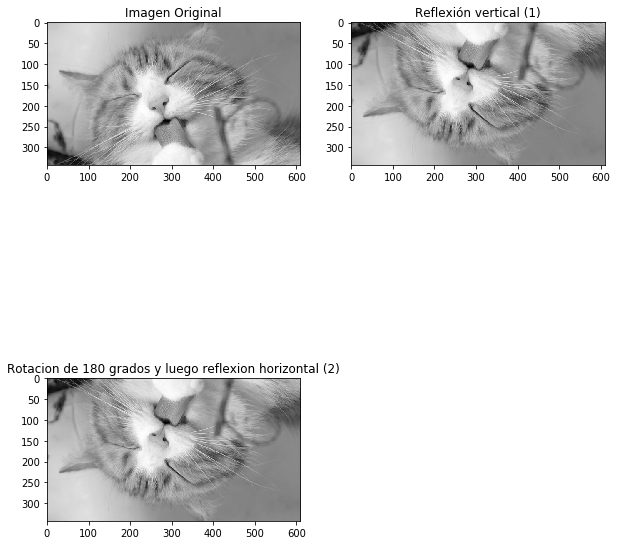

In [3]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np

#Lectura de la imagen en escala de grises
gato = cv2.imread('res/gato.jpg', cv2.IMREAD_GRAYSCALE)
#Obtener los datos de filas y columnas de la imagen
filas = gato.shape[0]
columnas = gato.shape[1]


#Generar la matriz de reflexión en Y
matriz_afin_ref_y = np.float32([[1,0,0]
                                ,[0,-1,filas]])
#Aplicar la matriz de transformación de reflexión Y a la imagen
ref_y = cv2.warpAffine(gato,matriz_afin_ref_y,(columnas,filas))

#Generar figura 2x2 que muestra la imagen original y las reflexiones
fig = plt.figure(figsize=(10,12))

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la matriz obtenida sobre la imagen leída
rot = cv2.warpAffine(gato,matriz_afin_rot,(columnas,filas))

#Aplicar una Reflexion horizontal para finalmente obtener la misma imagen

#Generar la matriz de reflexión en X
matriz_afin_ref_x = np.float32([[-1,0,columnas]
                                ,[0,1,0]])

#Aplicar la matriz de transformación de reflexión X a la imagen
rot = cv2.warpAffine(rot,matriz_afin_ref_x,(columnas,filas))

plt.subplot(2,2,1)
plt.imshow(gato,cmap='gray')
plt.title("Imagen Original")

plt.subplot(2,2,2)
plt.imshow(ref_y,cmap='gray')
plt.title("Reflexión vertical (1)")

plt.subplot(2,2,3)
plt.imshow(rot, cmap= 'gray')
plt.title("Rotacion de 180 grados y luego reflexion horizontal (2)")


#### Conclusion
para obtener la primera imagen "Reflexion vertical (1)" fue necesario solamente realizar una Reflexión con respecto a y de la matriz de la imagen original, sin embargo si queremos llegar al mismo resultado podríamos hacerlo empleando una Rotacion a la a la matriz de "Gato.jpg" de 180 grados y luego una reflexion con respecto a x de la imagen rotada anteriormente. 

no es de sorprenderse que es muy usual encontrarse con soluciones "mas rapidas" que otras.

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

Ayuda: Recuerde que la matriz afin de inclinación, viene dada por:

<img src = "res/mat.png">

Adicionalmente, recuerde que para aplicar la transformación afín sobre la imagen, puede utilizar la función de OpenCv, "cv2.warpAffine"

Text(0.5, 1.0, 'Imagen Inclinada con b = -0.2 y d = -0.2')

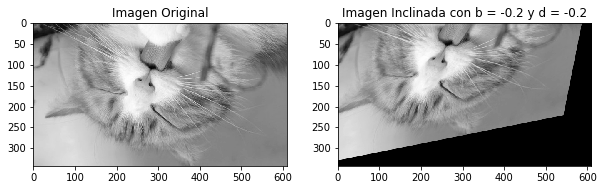

In [4]:
#crear la matriz de inclinación con b = -0.2 y d = -0.2
inc_x = -0.2
inc_y = -0.2
matriz_afin = np.float32([[1,inc_x,0],
                          [inc_y,1,0]])

#Aplicar la matriz generada a la imagen leída
res = cv2.warpAffine(rot,matriz_afin,(columnas,filas))

#Generar la figura 1x2 y mostrar entrada vs resultados
fig = plt.figure(figsize=(10,12))

plt.subplot(1,2,1)
plt.imshow(rot,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Inclinada con b = -0.2 y d = -0.2")

### conclusión
La Inclinación de una imagen sirve para darle "perspectiva" a la imagen si definimos la imagen como una región rectangular, los valores d y d de la matriz de inclinación permiten modificar la matriz original mediante operaciones del algebra matricial para simular la perspectiva conviertiendo una imagen rectangular en un rombo de acuerdo a los indices b y d de la matriz de inclinación. al aplicar este proceso se pierde información de la matriz original de la imagen por la "perspectiva" dada al aplicar esta transformación geometrica en nuestro caso particular podemos ver que la informacion de la parte superior y la del lado izquierda de la imagen se ha perdido.

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

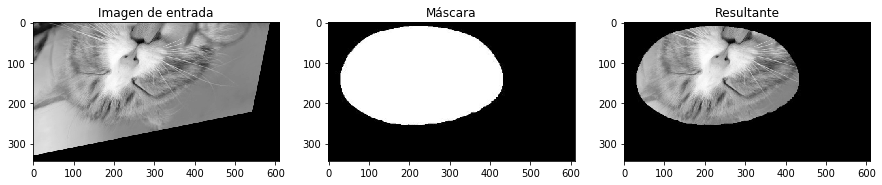

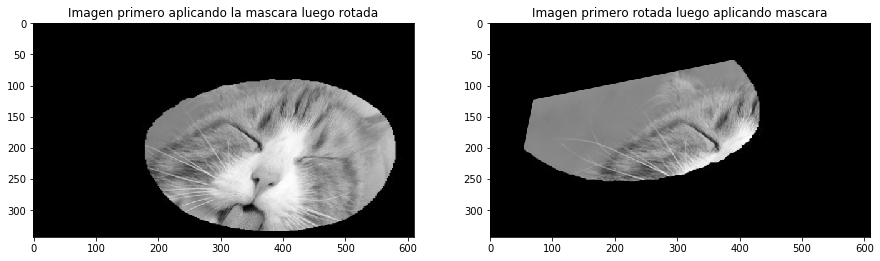

In [5]:
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mascara2.png', cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (res.shape[1], res.shape[0]))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = res* mascara
out = out/255
#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación AND
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15, 7))
ax1.set_title('Imagen de entrada')
ax2.set_title('Máscara')
ax3.set_title('Resultante')
ax1.imshow(res, cmap='gray')
ax2.imshow(mascara, cmap='gray')
ax3.imshow(out, cmap='gray')
fig1, (ax4,ax5) = plt.subplots(1,2, figsize=(15, 7))

#Aplicando una rotacion de 180 gradossobre la matriz out

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la rotacion sobre la matriz obtenida
rot = cv2.warpAffine(out,matriz_afin_rot,(columnas,filas))


ax4.set_title('Imagen primero aplicando la mascara luego rotada')
ax4.imshow(rot, cmap='gray')

#Ahora primero rotemos la imagen 180 grados y luego apliquemos la mascara

#Asignar un ángulo de rotación
theta = 180

#Selección del eje de rotación
rotation_center = ((columnas/2,filas/2))
#rotation_center = ((0,0))

#Con base en el ángulo, utilizar getRotationMatrix2D de cv2
matriz_afin_rot = cv2.getRotationMatrix2D(rotation_center,theta,1)

#Aplicar la rotacion sobre la matriz obtenida
rot1 = cv2.warpAffine(res,matriz_afin_rot,(columnas,filas))

#Luego apliquemos la mascara sobre la Imagen resultante
#Cargar la máscara, normalizarla dividiendo por 255 (ya que trabajamos datos uint8)
mascara = cv2.imread('res/mascara2.png', cv2.IMREAD_GRAYSCALE)/255
#Ajustar el tamaño de la máscara al de la img
mascara = cv2.resize(mascara, (rot1.shape[1], rot1.shape[0]))
#Aplicar la operación AND sobre la imagen de entrada y la máscara
out = rot1* mascara
out = out/255
ax5.set_title('Imagen primero rotada luego aplicando mascara')
ax5.imshow(out, cmap='gray')

### Conclusion
Los resultados son diferentes ya que al rotar la imagen respecto al centro de la imagen de entrada y luego aplicar la mascara la seccion del rostro del gato es diferente ya que como la mascara no ha rotado la porcion de la imagen que se conserva es diferente, sin embargo si aplicamos una rotacion a la mascara de 180 grados tal cual como lo hicimos con el gato la imagen resultante si seria igual a la obtenida luego de rotar y aplicar la mascara. 

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

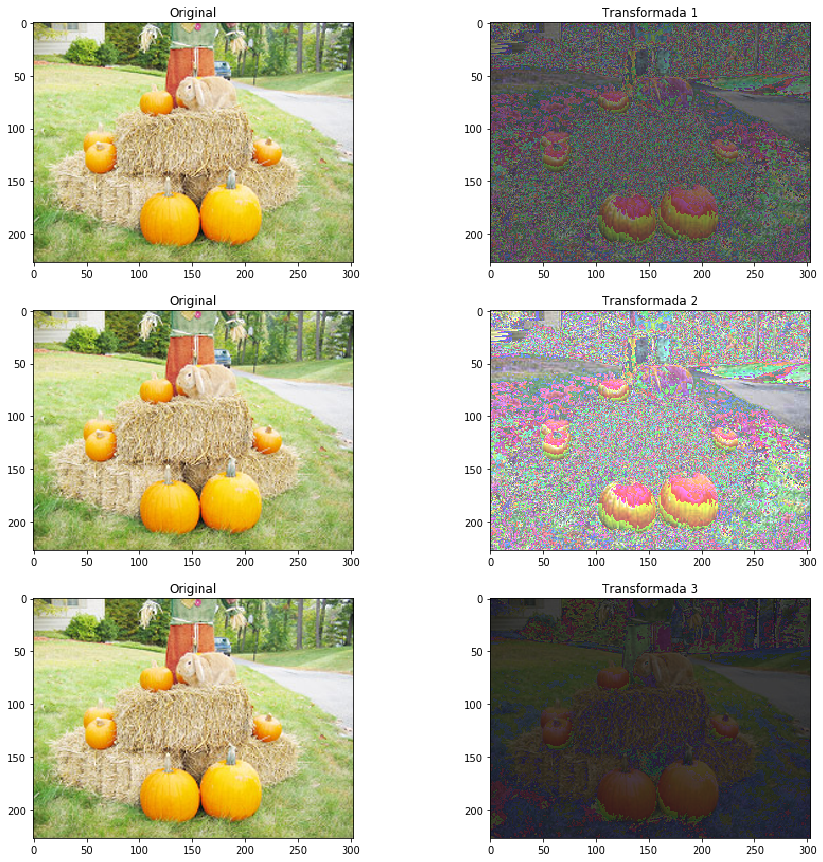

In [6]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline 
import numpy as np
import cv2
import matplotlib.pyplot as plt


def Transexp(a,b,c,img):
  
  dim = np.shape(img)

  C=c*np.ones((dim[0],dim[1],dim[2]))
  
  bMx = b*img
  bMxSc = bMx + C 

  bMxSc2 = bMxSc.copy().astype(np.float32)/255.0

  EbMxSc = np.exp(bMxSc2)

  aMEbMxSc = a*EbMxSc

  #Asegurar que la los datos queden entre 0 y 255 y sean uint8

  aMEbMxSc[aMEbMxSc<0] = 0
  aMEbMxSc = aMEbMxSc*255.0
  aMEbMxSc[aMEbMxSc>255] = 255


  aMEbMxSc = aMEbMxSc.astype(np.uint8)
  
  
  return (aMEbMxSc)


calabazas = cv2.imread('res/calabazas.png')
calabazas = cv2.cvtColor(calabazas,cv2.COLOR_BGR2RGB)


result = Transexp(0.2,5,0.5,calabazas)

result1 = Transexp(0.4,5,0.5,calabazas)

result2 = Transexp(0.1,2,0.3,calabazas)



fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(15, 15))


ax1.set_title('Original')
ax1.imshow(calabazas,cmap='gray')
ax2.set_title('Transformada 1')
ax2.imshow(result,cmap='gray')
ax3.set_title('Original')
ax3.imshow(calabazas,cmap='gray')
ax4.set_title('Transformada 2')
ax4.imshow(result1,cmap='gray')
ax5.set_title('Original')
ax5.imshow(calabazas,cmap='gray')
ax6.set_title('Transformada 3')
ax6.imshow(result2,cmap='gray')

### Conclusiones

Se puede observar como la transformación con los parametros adecuados puede ayudar a detectar sombras y reflejos, por ejemplo si observamos la primera transformación las areas en rosado son las que estan tiendo mejor iluminación si miramos las calabazas en la primera y segunda transformación notaremos que la parte superior de estas donde mas iluminación llega tienen un color rosado intenso, esto podría ser util si deseamos conocer la dirección en que viene la luz sobre un objeto.


## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

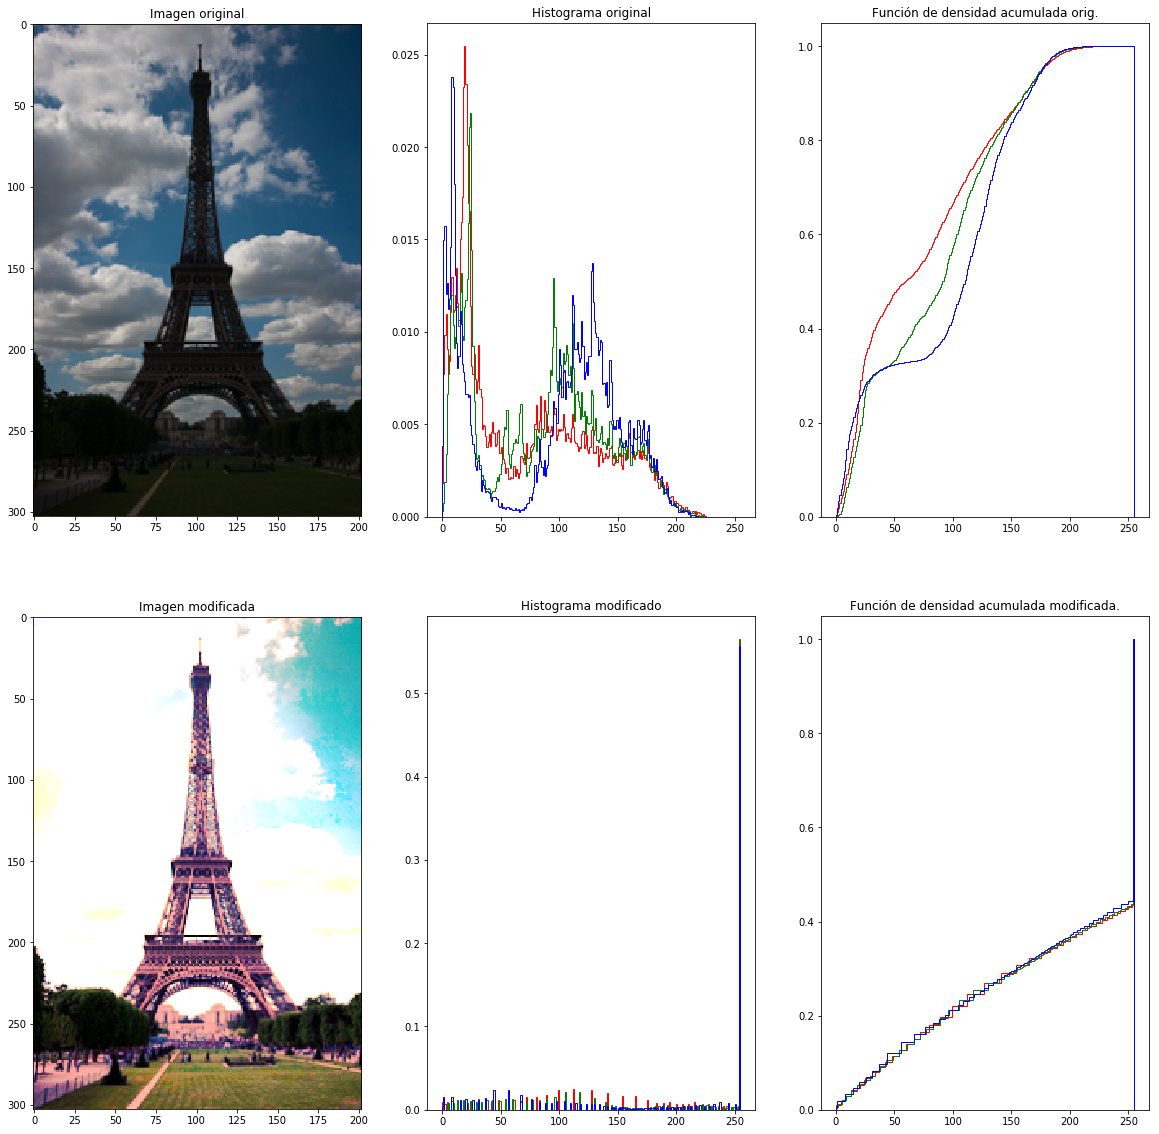

In [7]:
## Ecualizacion exponencial
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img, alfa = 0.5):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #res[img == g] = (gmax - gmin)*cdf[g] + gmin
        res[img == g] = -gmin - (1/alfa)*np.log(1-cdf[g] + 1e-8)*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log
C:\Users\Jacob\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


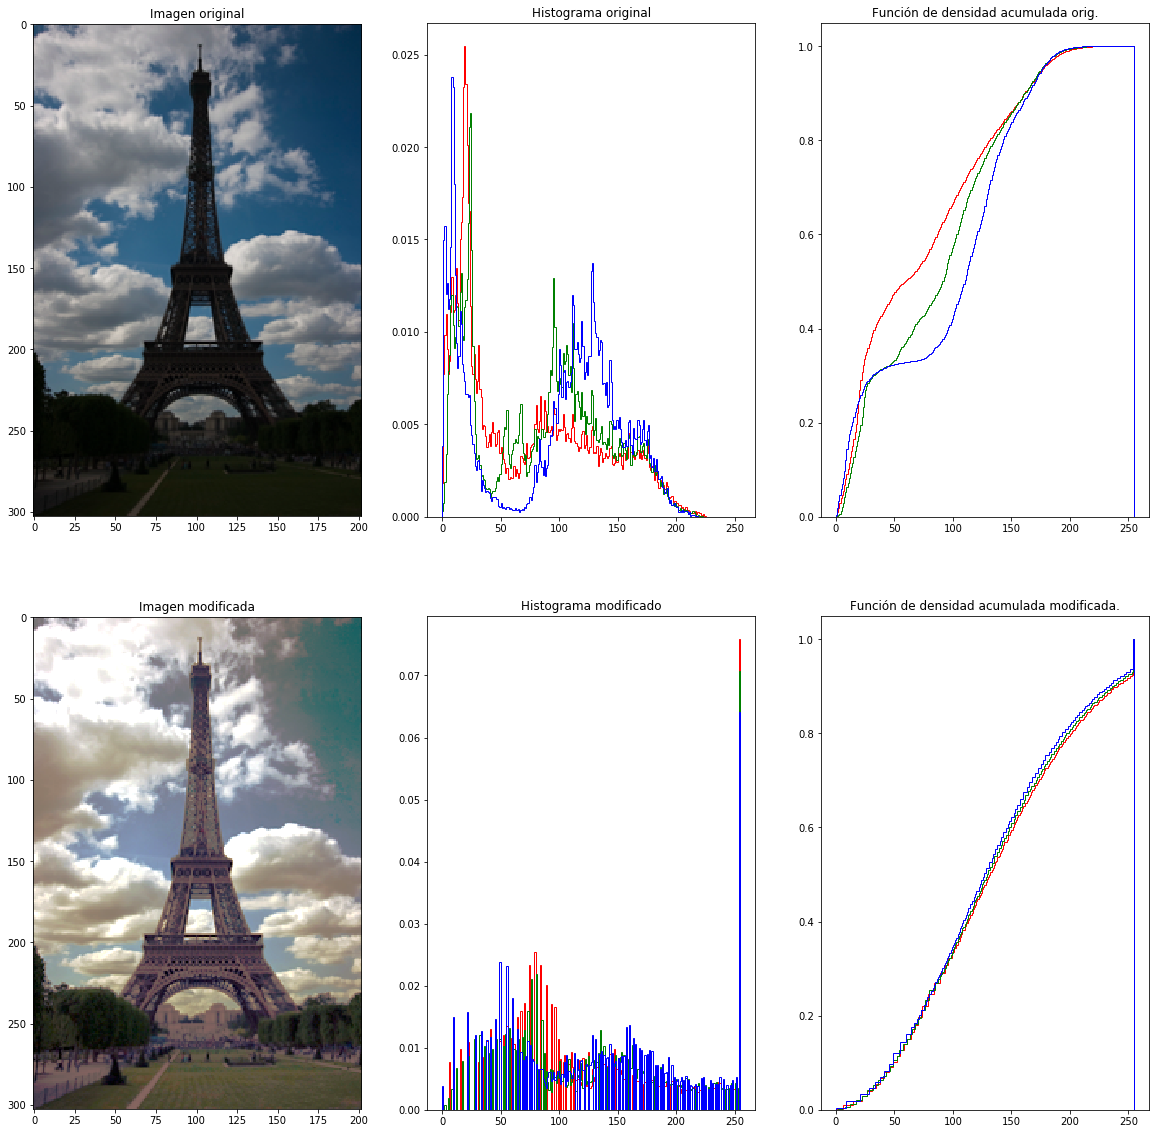

In [88]:
## Ecualizacion exponencial
#Importar librerias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img, alfa = 0.5):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), normed=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        #res[img == g] = (gmax - gmin)*cdf[g] + gmin
        res[img == g] = gmin + np.sqrt(-2*(alfa**2)*np.log(1-cdf[g]))*(gmax - gmin)
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/eiffel.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x3 para mostrar imagen, histograma y función de densidad acumulada
fig, arreglo_plots = plt.subplots(2,3, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
arreglo_plots[0,2].set_title('Función de densidad acumulada orig.')  
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = False)
arreglo_plots[1,2].set_title('Función de densidad acumulada modificada.')  
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,2].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i], cumulative = True)

### Conclusion
veamos que la ecualizacion es util porque permite aclarar o dar nitidez a detalles que antes estaban ocultos por una imagen oscura/clara, es decir que permite mejorar el contraste en la imagen sin perder demasiada información ya que los valores de el histograma se dispersan menos a los extremos y quedan todos concentrados pero presentes por lo que esta información no se pierde como en el caso cuando se realiza una sobre saturacion de brillo a una imagen caso como cuando realizamos por ejemplo una operacion de suma o multiplicacion de una imagen por un escalar en que muchos valores quedan en los extremos de intensidad lo cual se traduce en perdida de información importante de la imagen.

En el caso de la torre en concreto los niveles de intensidad que estan cerca al blanco habia muy pocos valores, con la ecualizacion podemos ver mas colores en estos lugares que antes estaban vacios, permitiendo ver mas detalles en la imagen.

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


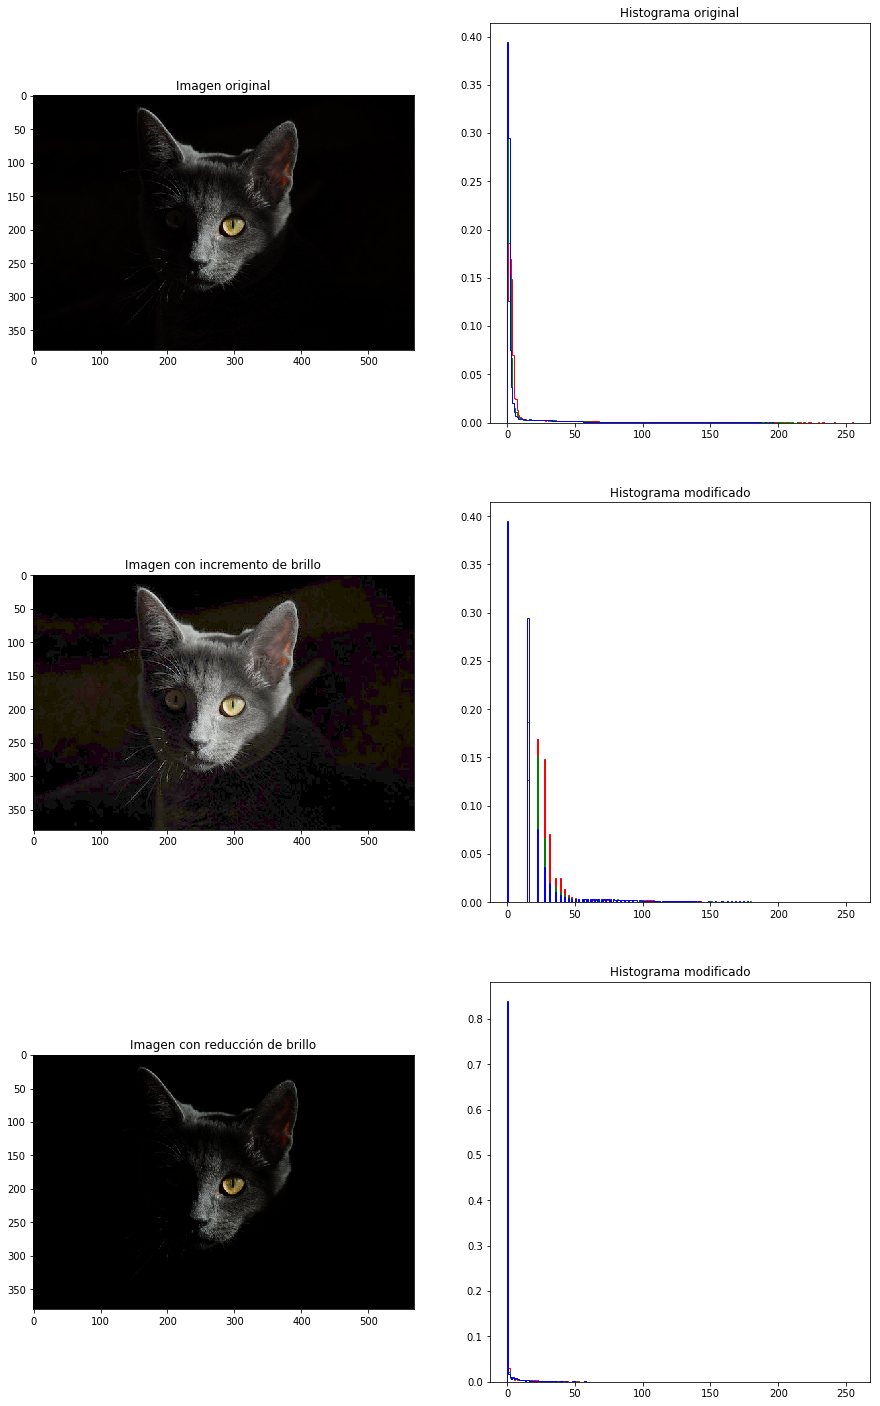

In [9]:
#Importar liberias
%matplotlib inline 

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 0.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_brillante = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 1.5

res_oscuro = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 2x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con incremento de brillo')
arreglo_plots[1,0].imshow(res_brillante, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_brillante[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo')
arreglo_plots[2,0].imshow(res_oscuro, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_oscuro[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),normed=True, color=colors[i])

### Conclusiones
El efecto de la transformacion gamma sobre una imagen muestra que potencias superiores a uno producen sombras más oscuras y mas oscuras, mientras que potencias inferiores a uno hacen que las zonas oscuras sean más claras.

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

El resultado de aplicar la convolución en img(1,1) es: 253


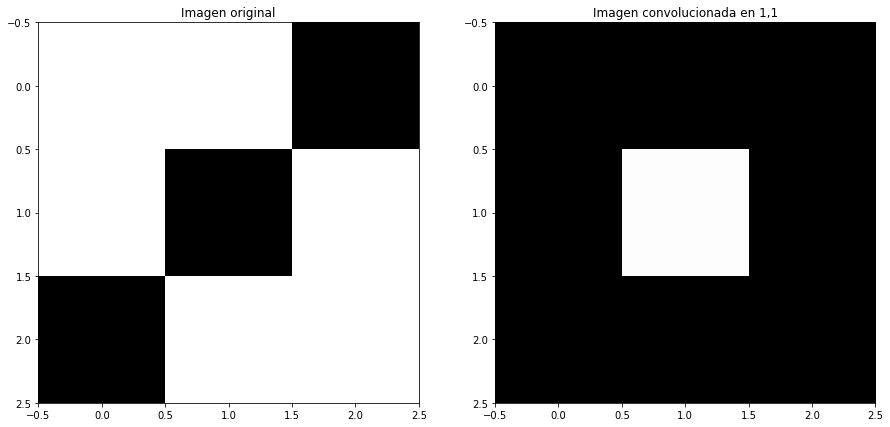

In [8]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Imagen de entrada, creada artificialmente
img = np.array([[255,255,0],
              [255,0,255],
              [0,255,255]], dtype=np.uint8)

#Posición (x,y)
x = 1
y = 1

#Máscara de convolución
w = np.array([[1/2,1/2,1/2],
              [1/2,1/2,1/2],
              [1/2,1/2,1/2]], dtype=np.float64)

k = 1 #el radio del kernel

#Crear una matriz de ceros del mismo tamaño de la imagen de entrada, datos flotantes
res = np.zeros(img.shape, dtype=np.float64)

#Recorrer todos los valores i,j de la imagen, en el intervalo del radio del kernel
for i in range(-k, k+1):
    for j in range(-k, k+1):
        #Resultado de la convolución en la posición 1,1
        res[1][1] += img[x+i][y+j] * w[k+i][k+j]

#Volver al tipo de dato uint8
res=res.astype(np.uint8)

print("El resultado de aplicar la convolución en img(1,1) es:", res[1][1])

#Generar subplot 1x2 para mostrar imagen original y convolucionada en 1,1
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada en 1,1')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

### Conclusion: 
En la primera parte del codigo se crea una imagen por medio de una matriz 3x3 junto con una mascara de convolucion con factor
de 1/2, , siguiendo la definicion matematica de convolucion, el cuadro central, que es de valor 0 (negro), tomara un valor de 7510, pero el valor maximo permitido es de 255, dejando este valor y el cuadro central tomara dicho valor, dejandolo blanco y
sus vecindades con valor 0. Esta clase de operaciones son muy utiles en el analisis de imagenes, ya que aplicando diferentes 
mascaras se puede obtener bordes de interes en las imagenes, como letras, rostros u objetos especificos. 